In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv('amazon.csv')

In [3]:
df.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,target
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908,1
1,2,17183,1540,117961,118343,123125,118536,118536,308574,118539,1
2,3,36724,14457,118219,118220,117884,117879,267952,19721,117880,1
3,4,36135,5396,117961,118343,119993,118321,240983,290919,118322,1
4,5,42680,5905,117929,117930,119569,119323,123932,19793,119325,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
 10  target            32769 non-null  int64
dtypes: int64(11)
memory usage: 2.8 MB


In [5]:
column_to_drop = 'id'
df = df.drop(column_to_drop, axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   RESOURCE          32769 non-null  int64
 1   MGR_ID            32769 non-null  int64
 2   ROLE_ROLLUP_1     32769 non-null  int64
 3   ROLE_ROLLUP_2     32769 non-null  int64
 4   ROLE_DEPTNAME     32769 non-null  int64
 5   ROLE_TITLE        32769 non-null  int64
 6   ROLE_FAMILY_DESC  32769 non-null  int64
 7   ROLE_FAMILY       32769 non-null  int64
 8   ROLE_CODE         32769 non-null  int64
 9   target            32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [7]:
# Kiểm tra giá trị trùng lặp
duplicates = df.duplicated()
print("Số lượng giá trị trùng lặp:", duplicates.sum())
print(duplicates)

Số lượng giá trị trùng lặp: 0
0        False
1        False
2        False
3        False
4        False
         ...  
32764    False
32765    False
32766    False
32767    False
32768    False
Length: 32769, dtype: bool


In [8]:
# remove rows that duplicate
df = df.drop_duplicates();
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   RESOURCE          32769 non-null  int64
 1   MGR_ID            32769 non-null  int64
 2   ROLE_ROLLUP_1     32769 non-null  int64
 3   ROLE_ROLLUP_2     32769 non-null  int64
 4   ROLE_DEPTNAME     32769 non-null  int64
 5   ROLE_TITLE        32769 non-null  int64
 6   ROLE_FAMILY_DESC  32769 non-null  int64
 7   ROLE_FAMILY       32769 non-null  int64
 8   ROLE_CODE         32769 non-null  int64
 9   target            32769 non-null  int64
dtypes: int64(10)
memory usage: 2.8 MB


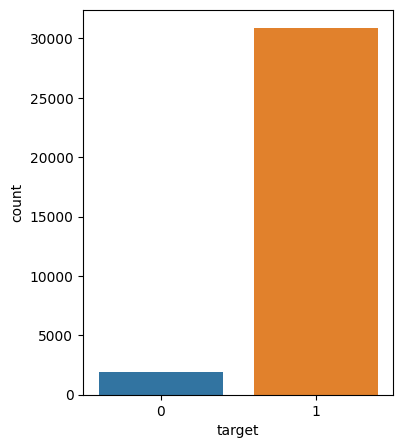

In [9]:
# check data unbalanced
plt.figure(figsize=(4,5))
sns.countplot(x='target', data=df)
plt.show()

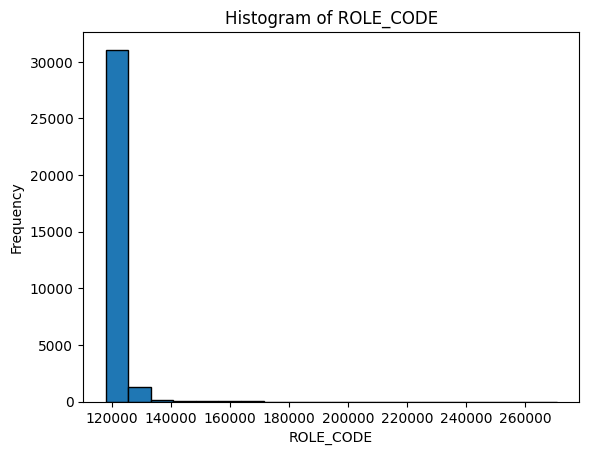

In [10]:
# Dựng histogram của cột được chọn
plt.hist(df['ROLE_CODE'], bins=20, edgecolor='black')
plt.title(f'Histogram of ROLE_CODE')
plt.xlabel('ROLE_CODE')
plt.ylabel('Frequency')
plt.show()

In [11]:
#get all feature names
feature_names = df.columns[0:9].tolist()
print(feature_names)

['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']


In [12]:
#split features and target
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

print(X)
print(y)

       RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0         39353   85475         117961         118300         123472   
1         17183    1540         117961         118343         123125   
2         36724   14457         118219         118220         117884   
3         36135    5396         117961         118343         119993   
4         42680    5905         117929         117930         119569   
...         ...     ...            ...            ...            ...   
32764     23497   16971         117961         118300         119993   
32765     25139  311198          91261         118026         122392   
32766     34924   28805         117961         118327         120299   
32767     80574   55643         118256         118257         117945   
32768     14354   59575         117916         118150         117920   

       ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0          117905            117906       290919     117908  
1          

In [13]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [14]:
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

df_balanced.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,target
0,39353,85475,117961,118300,123472,117905,117906,290919,117908,1
1,17183,1540,117961,118343,123125,118536,118536,308574,118539,1
2,36724,14457,118219,118220,117884,117879,267952,19721,117880,1
3,36135,5396,117961,118343,119993,118321,240983,290919,118322,1
4,42680,5905,117929,117930,119569,119323,123932,19793,119325,1


In [15]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61744 entries, 0 to 61743
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   RESOURCE          61744 non-null  int64
 1   MGR_ID            61744 non-null  int64
 2   ROLE_ROLLUP_1     61744 non-null  int64
 3   ROLE_ROLLUP_2     61744 non-null  int64
 4   ROLE_DEPTNAME     61744 non-null  int64
 5   ROLE_TITLE        61744 non-null  int64
 6   ROLE_FAMILY_DESC  61744 non-null  int64
 7   ROLE_FAMILY       61744 non-null  int64
 8   ROLE_CODE         61744 non-null  int64
 9   target            61744 non-null  int64
dtypes: int64(10)
memory usage: 4.7 MB


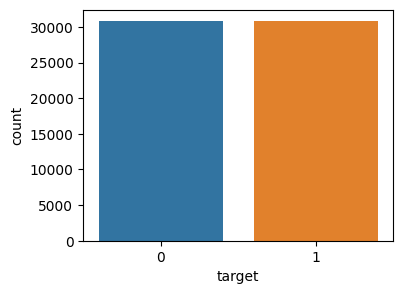

In [21]:
# check data unbalanced
plt.figure(figsize=(4,3))
sns.countplot(x='target', data=df_balanced)
plt.show()

In [22]:
scaler = MinMaxScaler()

for i in feature_names:
    column_data = df_balanced[i].values.reshape(-1, 1)
    scaled_column = scaler.fit_transform(column_data)
    df_balanced[i] = scaled_column.flatten()

df_balanced.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,target
0,0.126070,0.274167,0.370395,0.359379,0.421093,0.000134,0.368604,0.942199,0.000183,1
1,0.055047,0.004861,0.370395,0.359543,0.419863,0.003387,0.370655,1.000000,0.004313,1
2,0.117647,0.046305,0.371236,0.359075,0.401286,0.000000,0.857045,0.054318,0.000000,1
3,0.115761,0.017233,0.370395,0.359543,0.408762,0.002278,0.769253,0.942199,0.002892,1
4,0.136728,0.018866,0.370291,0.357972,0.407259,0.007444,0.388220,0.054553,0.009456,1


In [ ]:
df_balanced.to_csv('amazon_after_process.csv', index=False)

In [ ]:
df_balanced.to_csv('amazon_after_process_no_scale.csv', index=False)